In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import cv2
from collections import Counter
import os

img_list = glob.glob('/content/drive/MyDrive/labeled/*.png')
print(len(img_list))

6150


(40, 28)
p


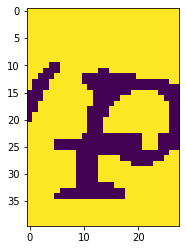

In [ ]:
img = cv2.imread(img_list[0], cv2.IMREAD_GRAYSCALE)
print(img.shape)
print(img_list[0].split('/')[5][0])
plt.imshow(img)

In [ ]:
data = []
label = []

for i in img_list:
  img = cv2.imread(r''+i, cv2.IMREAD_GRAYSCALE)
  img = (255.0 - img) / 255.0
  img = np.reshape(img, (1120, ))
  data.append(img)
  label.append(i.split('/')[5][0])

print(len(data), len(label))
print(label[0])
data = np.array(data)
print(data.shape)

6150 6150
p
(6150, 1120)


In [ ]:
import tensorflow as tf

print(label[3151])

label_c = []

for i in label:
  if ord(i) == ord('9'):
    label_c.append(6)
  elif ord(i) < ord('9'):
    label_c.append(ord(i)-50)
  elif ord(i) < ord('i'):
    label_c.append(ord(i)-90)
  elif ord(i) == ord('k'):
    label_c.append(15)
  elif ord(i) < ord('o'):
    label_c.append(ord(i)-93)
  elif ord(i) == ord('p'):
    label_c.append(18)
  elif ord(i) == ord('r'):
    label_c.append(19)
  elif ord(i) == ord('w'):
    label_c.append(20)
  elif ord(i) == ord('x'):
    label_c.append(21)
  else:
    label_c.append(22)

b


In [ ]:
print(ord('m'))
print(np.unique(label_c))
print(len(np.unique(label_c)))

109
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
23


In [ ]:
from sklearn.model_selection import train_test_split

d_train, d_test, l_train, l_test = train_test_split(data, label_c, test_size=0.3, stratify=label, random_state=0)

l_train_1hot = tf.one_hot(l_train, 23)
l_test_1hot= tf.one_hot(l_test, 23)

print(len(d_train), len(d_test))
print(d_train.shape)
print(d_train.shape)

4305 1845
(4305, 1120)
(4305, 1120)


In [ ]:
import tensorflow as tf
#MLP 모델 정의

# act = "linear"
# act = "sigmoid"
# act = "tanh"
act = "relu"

# 3개의 층 128개의 노드
model1 = tf.keras.models.Sequential([
  # 28x28 입력층
  tf.keras.layers.Flatten(input_shape=(40, 28)),
  tf.keras.layers.Dense(128, activation=act),
  tf.keras.layers.Dense(128, activation=act),
  tf.keras.layers.Dense(128, activation=act),
  tf.keras.layers.Dense(23, activation="softmax")
])

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
# opt = tf.keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.1)

model1.compile(loss='categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

In [ ]:
model1.fit(d_train, l_train_1hot, epochs = 50)

Epoch 1/50
135/135 [==============================] - 1s 2ms/step - loss: 1.3154 - accuracy: 0.6137
Epoch 2/50
135/135 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.8530
Epoch 3/50
135/135 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.8997
Epoch 4/50
135/135 [==============================] - 0s 2ms/step - loss: 0.2988 - accuracy: 0.9075
Epoch 5/50
135/135 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.9289
Epoch 6/50
135/135 [==============================] - 0s 2ms/step - loss: 0.1862 - accuracy: 0.9452
Epoch 7/50
135/135 [==============================] - 0s 2ms/step - loss: 0.1522 - accuracy: 0.9528
Epoch 8/50
135/135 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9517
Epoch 9/50
135/135 [==============================] - 0s 2ms/step - loss: 0.1781 - accuracy: 0.9517
Epoch 10/50
135/135 [==============================] - 0s 2ms/step - loss: 0.1885 - accuracy: 0.9459

In [ ]:
model1.evaluate(d_test,  l_test_1hot, verbose=2)

58/58 - 0s - loss: 0.7988 - accuracy: 0.9230


[0.7988327741622925, 0.923035204410553]

In [ ]:
unlabel_list = glob.glob('/content/drive/MyDrive/unlabeled/*.png')
print(len(unlabel_list))

10692


(40, 28)


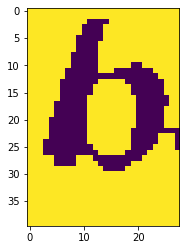

In [ ]:
img = cv2.imread(unlabel_list[5], cv2.IMREAD_GRAYSCALE)
print(img.shape)
plt.imshow(img)

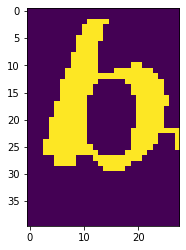

In [ ]:
img = (255.0 - img) / 255.0
plt.imshow(img)

In [ ]:
test = []
img = np.reshape(img, (1120, ))
test.append(img)
test = np.array(test)
x1 = model1(test)
x2 = model1.predict_classes(test)
print(x1)
print(x2)

original = [2, 3, 4, 5, 6, 7, 8, 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'm', 'n', 'p', 'r', 'w', 'x', 'y']

print(original[int(x2)])

tf.Tensor(
[[1.3568054e-08 1.4100224e-09 3.0474668e-11 3.1774395e-08 5.0782360e-06
  9.2306654e-16 8.3054681e-15 7.3987359e-16 9.9067616e-01 8.3929206e-07
  8.9686196e-13 1.6228314e-11 8.6223103e-12 1.2657035e-14 3.1681714e-06
  6.2174058e-06 4.3941269e-13 9.3043000e-03 1.6148327e-13 9.1302460e-12
  1.0005103e-12 4.1276317e-06 4.2426610e-17]], shape=(1, 23), dtype=float32)
[8]
b


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
count = 0
for i in unlabel_list:
  img = cv2.imread(i , cv2.IMREAD_GRAYSCALE)
  img = (255.0 - img) / 255.0
  img = np.reshape(img, (1120, ))
  original = ['2', '3', '4', '5', '6', '7', '8', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'm', 'n', 'p', 'r', 'w', 'x', 'y']

  test = []
  test.append(img)
  test = np.array(test)
  result = model1.predict_classes(test)
  
  os.rename(i, '/content/drive/MyDrive/unlabeled/' + original[int(result)] + '_' + str(count) + '.png')

  count += 1

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
captcha_list = glob.glob('/content/drive/MyDrive/cap/*.png')

print(len(captcha_list))

13447


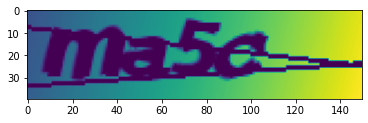

In [ ]:
img = cv2.imread(captcha_list[666], cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

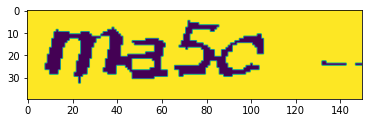

In [ ]:
kernel = np.ones((3, 3), np.uint8)

th1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

dilation_image = cv2.dilate(th1, kernel, iterations=1)

plt.imshow(dilation_image)

In [ ]:
original = ['2', '3', '4', '5', '6', '7', '8', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'm', 'n', 'p', 'r', 'w', 'x', 'y']
start = 5
w = 28
title = ''

for count in range(4):
  test = []
  gap = 8
  
  part = dilation_image[0:50, start:start+w].copy()

  part = (255.0 - part) / 255.0
  part = np.reshape(part, (1120, ))
  test.append(part)
  test = np.array(test)
  result = original[int(model1.predict_classes(test))]

  title += result
  
  if result == 'w' or result == 'm' or result == 'p':
          gap = 0
      
  if result == 'f':
      gap = 10

  start = start + w - gap

print(title)

ma5c


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
for i in captcha_list:
  img = cv2.imread(i, cv2.IMREAD_GRAYSCALE)

  kernel = np.ones((3, 3), np.uint8)
  try:
    th1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    dilation_image = cv2.dilate(th1, kernel, iterations=1)

    original = ['2', '3', '4', '5', '6', '7', '8', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'm', 'n', 'p', 'r', 'w', 'x', 'y']
    start = 5
    w = 28
    title = ''

    for count in range(4):
      test = []
      gap = 8
      
      part = dilation_image[0:50, start:start+w].copy()

      part = (255.0 - part) / 255.0
      part = np.reshape(part, (1120, ))
      test.append(part)
      test = np.array(test)
      result = original[int(model1.predict_classes(test))]

      title += result
      
      if result == 'w' or result == 'm' or result == 'p':
              gap = 1

      if result == 'x' or result == 'y':
              gap = 4
          
      if result == 'f':
          gap = 10

      start = start + w - gap

    try:
      os.rename(i, '/content/drive/MyDrive/cap/' + title + '.png')
    except:
      pass

  except:
    pass

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


KeyboardInterrupt: ignored